In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [252]:
df = pd.read_csv('heart.csv')

## Problem Statement
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression

In [190]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [191]:
df.shape

(4238, 16)

In [192]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [194]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [195]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


## Filling null values

In [196]:
df.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [253]:
df.education.fillna((df.education.median()), inplace=True)
df.cigsPerDay.fillna((df.cigsPerDay.mean()), inplace=True)
df.BPMeds.fillna((df.BPMeds.median()), inplace=True)
df.totChol.fillna((df.totChol.mean()), inplace=True)
df.BMI.fillna((df.BMI.mean()), inplace=True)
df.heartRate.fillna((df.heartRate.mean()), inplace=True)
df.glucose.fillna((df.glucose.mean()), inplace=True)

In [198]:
df.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [199]:
df.head(10)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
5,0,43,2.0,0,0.0,0.0,0,1,0,228.0,180.0,110.0,30.30,77.0,99.0,0
6,0,63,1.0,0,0.0,0.0,0,0,0,205.0,138.0,71.0,33.11,60.0,85.0,1
7,0,45,2.0,1,20.0,0.0,0,0,0,313.0,100.0,71.0,21.68,79.0,78.0,0
8,1,52,1.0,0,0.0,0.0,0,1,0,260.0,141.5,89.0,26.36,76.0,79.0,0
9,1,43,1.0,1,30.0,0.0,0,1,0,225.0,162.0,107.0,23.61,93.0,88.0,0


In [254]:
df = df.rename({'male': 'sex'}, axis=1)

## Changing column name male to sex where,
## SEX
### Male = 1
### Female = 0

In [201]:
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [202]:
df.education.value_counts()

1.0    1720
2.0    1358
3.0     687
4.0     473
Name: education, dtype: int64

In [203]:
df.sex.value_counts()

0    2419
1    1819
Name: sex, dtype: int64

## 1) SEX distribution in dataset

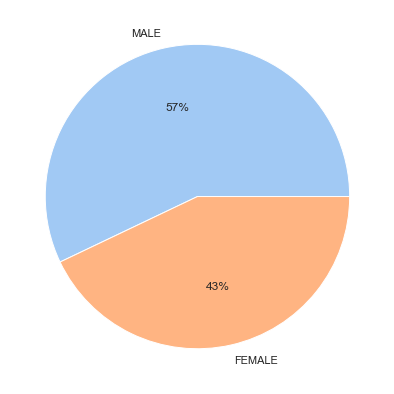

In [204]:
sns.set_style('darkgrid')
color = sns.color_palette('pastel')[0:5]
plt.pie(df.sex.value_counts(), labels = ['MALE','FEMALE'],colors = color,  autopct='%.0f%%',radius=1)
plt.show()

## 2) Lets see the effect of Disease on particular Sex

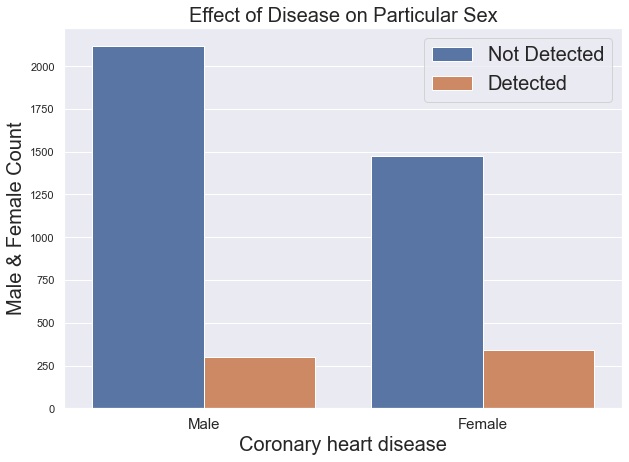

In [205]:
sns.set()
plt1 = sns.countplot('sex',hue='TenYearCHD',data=df);
plt1.set_xlabel("Coronary heart disease", fontsize = 20)
plt1.set_ylabel("Male & Female Count", fontsize = 20)
plt1.set_title("Effect of Disease on Particular Sex", fontsize = 20)
plt.legend(labels=["Not Detected","Detected"], fontsize = 20)
plt1.set_xticklabels(labels=["Male","Female"],fontsize=15);

## 3) Male age distribution

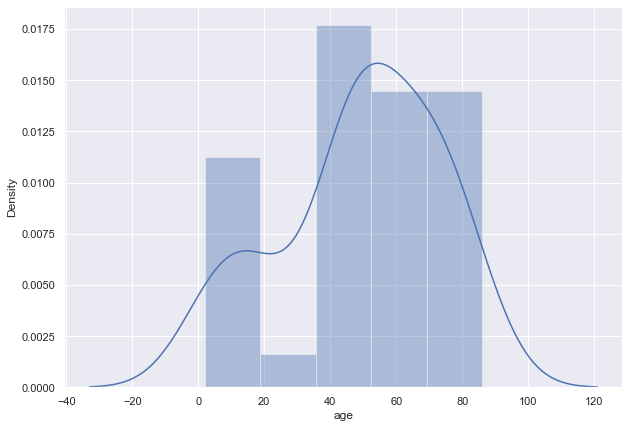

In [206]:
sns.distplot(df[df.sex==1].age.value_counts(ascending=False));

## 4) Female age distribution

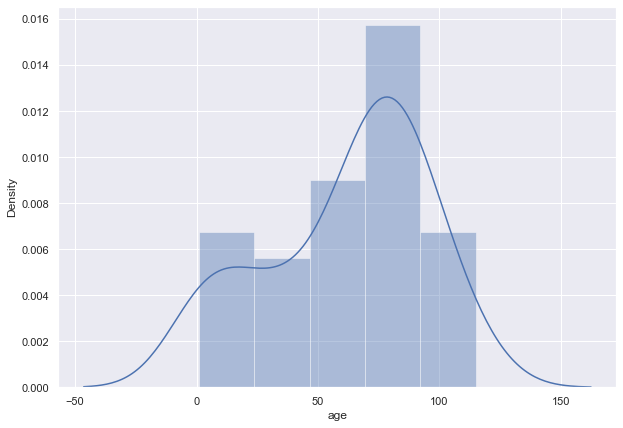

In [207]:
sns.distplot(df[df.sex==0].age.value_counts(ascending=False));

## 6) Now lets see education difference between MALE and FEMALE

In [208]:
df[df.sex==1].education.value_counts()

1.0    777
2.0    542
4.0    276
3.0    224
Name: education, dtype: int64

In [209]:
df[df.sex==0].education.value_counts()

1.0    943
2.0    816
3.0    463
4.0    197
Name: education, dtype: int64

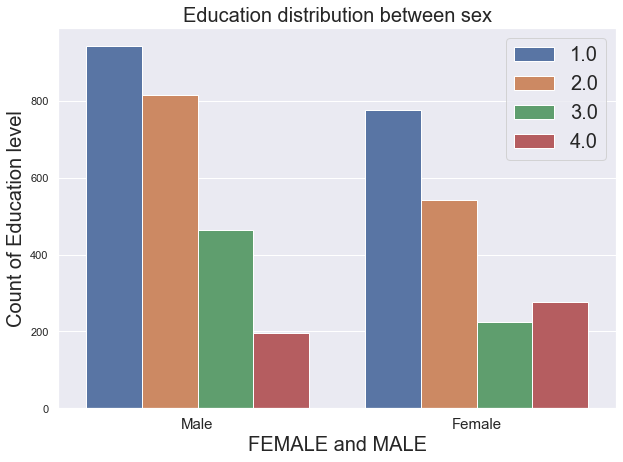

In [212]:
sns.set(rc={'figure.figsize':(10,7)})
p1 = sns.countplot('sex',hue='education',data=df,)
p1.set_xlabel("FEMALE and MALE", fontsize = 20)
p1.set_ylabel("Count of Education level", fontsize = 20)
p1.set_title("Education distribution between sex", fontsize = 20)
p1.set_xticklabels(labels=["Male","Female"],fontsize=15)
plt.legend(fontsize = 20);

## 7) Number of current smokers in the data

In [213]:
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## 8) Current smokers and Non smokers ratrio is amolst equal

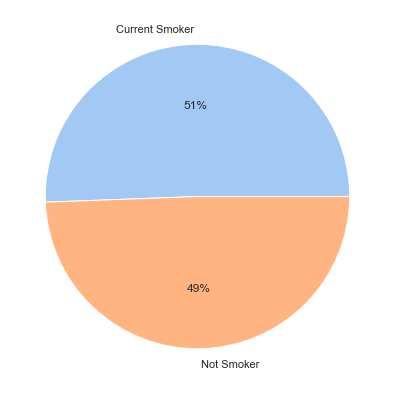

In [214]:
plt.pie(df.currentSmoker.value_counts(), labels = ['Current Smoker','Not Smoker'],colors = color,  autopct='%.0f%%')
plt.show()

## 9) Smokers between Male and Female

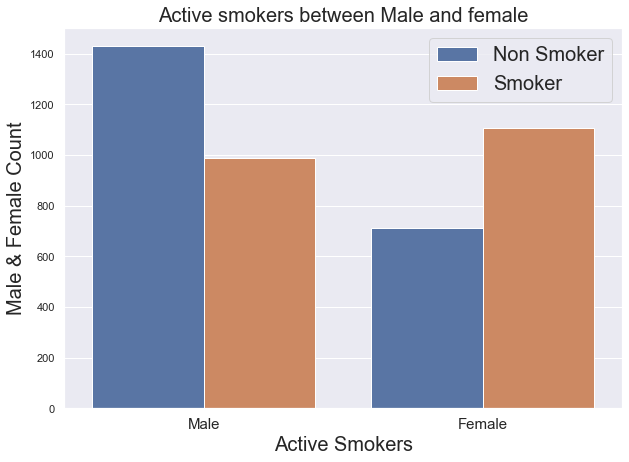

In [215]:
p = sns.countplot('sex',hue='currentSmoker',data=df);
p.set_xlabel("Active Smokers", fontsize = 20)
p.set_ylabel("Male & Female Count", fontsize = 20)
p.set_title("Active smokers between Male and female", fontsize = 20)
plt.legend(labels=["Non Smoker","Smoker"], fontsize = 20)
p.set_xticklabels(labels=["Male","Female"],fontsize=15)
plt.show();

## 10) Effect of Smoking on CHD

In [216]:
df[df.currentSmoker==1].TenYearCHD.value_counts()

0    1761
1     333
Name: TenYearCHD, dtype: int64

In [217]:
df[df.currentSmoker==0].TenYearCHD.value_counts()

0    1833
1     311
Name: TenYearCHD, dtype: int64

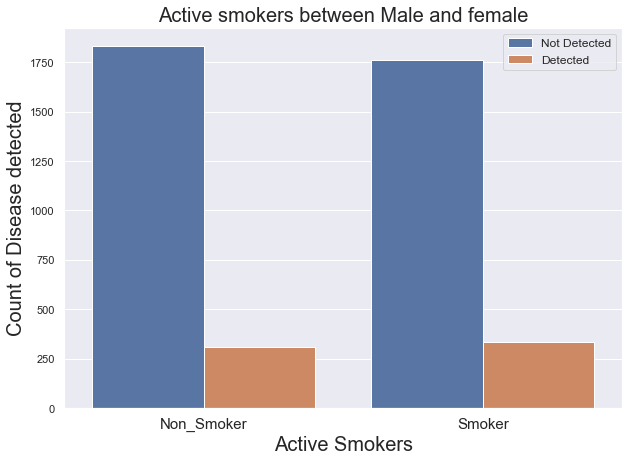

In [218]:
p = sns.countplot('currentSmoker',hue='TenYearCHD',data=df,)
p.set_xlabel("Active Smokers", fontsize = 20)
p.set_ylabel("Count of Disease detected", fontsize = 20)
p.set_title("Active smokers between Male and female", fontsize = 20)
plt.legend(labels=["Not Detected","Detected"], fontsize = 12)
p.set_xticklabels(labels=["Non_Smoker","Smoker"],fontsize=15)
plt.show();

In [219]:
df.head()

,sex,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


## 11) Cigarettes per day smoked by smoker

In [220]:
df['cigsPerDay'] = df['cigsPerDay'].astype(int)
df.cigsPerDay.value_counts().head()

0     2144
20     734
30     217
15     210
9      159
Name: cigsPerDay, dtype: int64

## 12) Effect of CHD on non Smokers

In [221]:
non_smokers = df[df.cigsPerDay==0].TenYearCHD.value_counts()

In [222]:
non_smokers

0    1833
1     311
Name: TenYearCHD, dtype: int64

In [1]:
plt.pie(non_smokers, labels = ['Not Detected','Detected'],colors = color,  autopct='%.0f%%')
plt.title("% of CHD deteced in Non Smokers", fontsize = 20)
plt.show()

NameError: name 'plt' is not defined

## 13) Effect of CHD on Smokers

In [224]:
smokers = df[df.cigsPerDay>0]

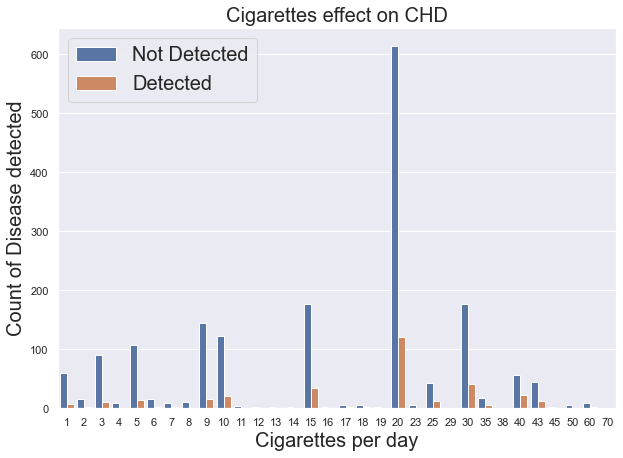

In [225]:
plt2 = sns.countplot(x='cigsPerDay',hue='TenYearCHD',data=smokers)
plt2.set_xlabel("Cigarettes per day", fontsize = 20)
plt2.set_ylabel("Count of Disease detected", fontsize = 20)
plt2.set_title("Cigarettes effect on CHD", fontsize = 20)
plt.legend(labels=["Not Detected","Detected"], fontsize = 20);

## 14) Effect of Blood pressuse mediciation on CHD

In [226]:
bp_meds = df.groupby(['BPMeds']).TenYearCHD.value_counts()
bp_meds

BPMeds  TenYearCHD
0.0     0             3511
        1              603
1.0     0               83
        1               41
Name: TenYearCHD, dtype: int64

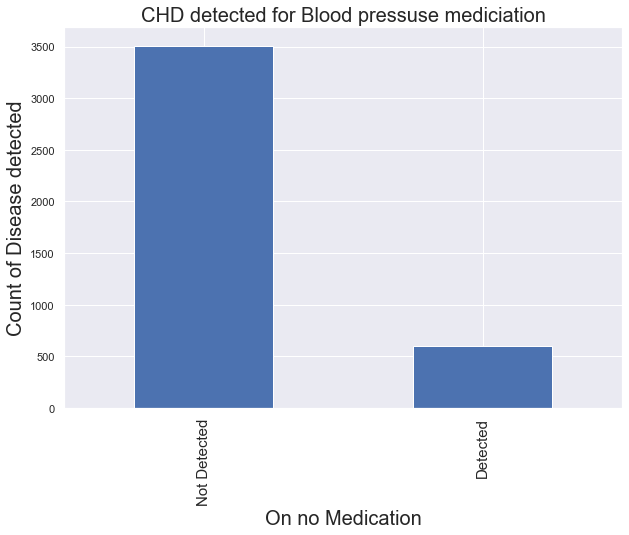

In [227]:
plt3 = bp_meds[0].plot(kind='bar')
plt3.set_xlabel("On no Medication", fontsize = 20)
plt3.set_ylabel("Count of Disease detected", fontsize = 20)
plt3.set_title("CHD detected for Blood pressuse mediciation", fontsize = 20)
plt3.set_xticklabels(labels=["Not Detected","Detected"],fontsize=15);

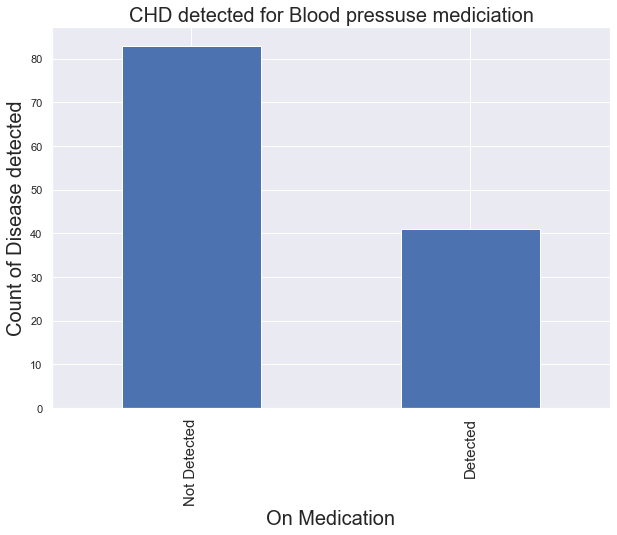

In [228]:
plt4 = bp_meds[1].plot(kind='bar')
plt4.set_xlabel("On Medication", fontsize = 20)
plt4.set_ylabel("Count of Disease detected", fontsize = 20)
plt4.set_title("CHD detected for Blood pressuse mediciation", fontsize = 20)
plt4.set_xticklabels(labels=["Not Detected","Detected"],fontsize=15);

## 15) Prevalent Stroke and hypertensive effect on CHD

In [229]:
df.groupby(['prevalentStroke']).TenYearCHD.value_counts()

prevalentStroke  TenYearCHD
0                0             3580
                 1              633
1                0               14
                 1               11
Name: TenYearCHD, dtype: int64

In [230]:
df.groupby(['prevalentHyp']).TenYearCHD.value_counts()

prevalentHyp  TenYearCHD
0             0             2603
              1              319
1             0              991
              1              325
Name: TenYearCHD, dtype: int64

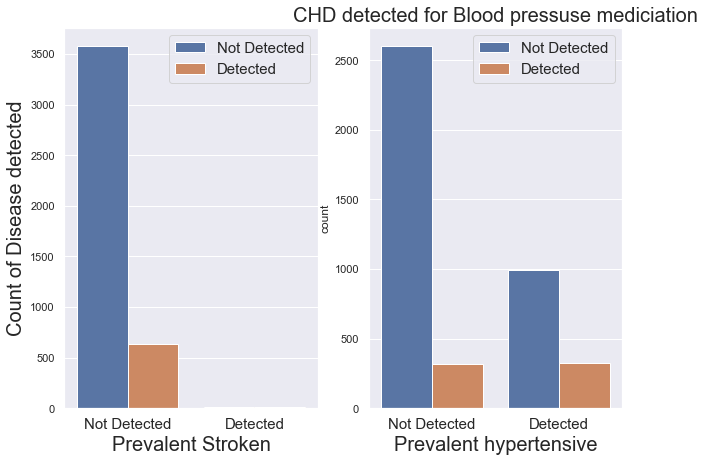

In [231]:
fig, axes = plt.subplots(1,2)
sns.countplot(x='prevalentStroke',hue='TenYearCHD',data=df,ax=axes[0])
sns.countplot(x='prevalentHyp',hue='TenYearCHD',data=df,ax=axes[1])
plt.title("CHD detected for Blood pressuse mediciation", fontsize = 20,loc='center')
axes[0].set_xlabel("Prevalent Stroken", fontsize = 20)
axes[1].set_xlabel("Prevalent hypertensive", fontsize = 20)
axes[0].set_ylabel("Count of Disease detected", fontsize = 20)
axes[0].set_xticklabels(labels=["Not Detected","Detected"],fontsize=15);
axes[1].set_xticklabels(labels=["Not Detected","Detected"],fontsize=15);
axes[0].legend(labels=["Not Detected","Detected"], fontsize = 15);
axes[1].legend(labels=["Not Detected","Detected"], fontsize = 15);

## 16) Effects of Diabeties on CHD

In [232]:
df.diabetes.value_counts()

0    4129
1     109
Name: diabetes, dtype: int64

In [233]:
non_diabetic = df[df.diabetes==0].TenYearCHD.value_counts()
diabetic = df[df.diabetes==1].TenYearCHD.value_counts()

In [234]:
non_diabetic,diabetic

(0    3525
 1     604
 Name: TenYearCHD, dtype: int64,
 0    69
 1    40
 Name: TenYearCHD, dtype: int64)

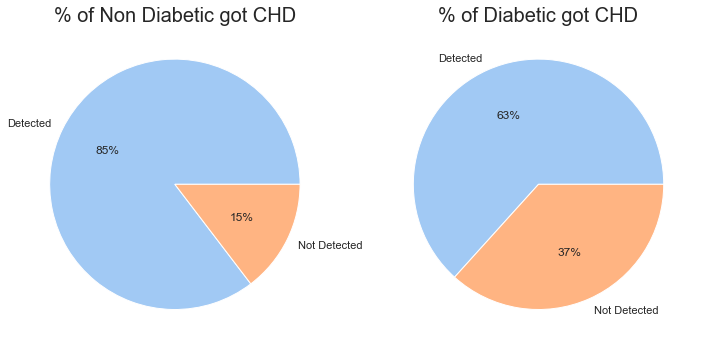

In [235]:
fig, axes = plt.subplots(1,2)
axes[0].pie(non_diabetic, labels = ['Detected','Not Detected'],colors = color,  autopct='%.0f%%')
axes[1].pie(diabetic, labels = ['Detected','Not Detected'],colors = color,  autopct='%.0f%%')
axes[0].set_title("% of Non Diabetic got CHD", fontsize = 20,loc='center')
axes[1].set_title("% of Diabetic got CHD", fontsize = 20,loc='center')
plt.tight_layout()

## 17) Distribution of contineous variables in dataset

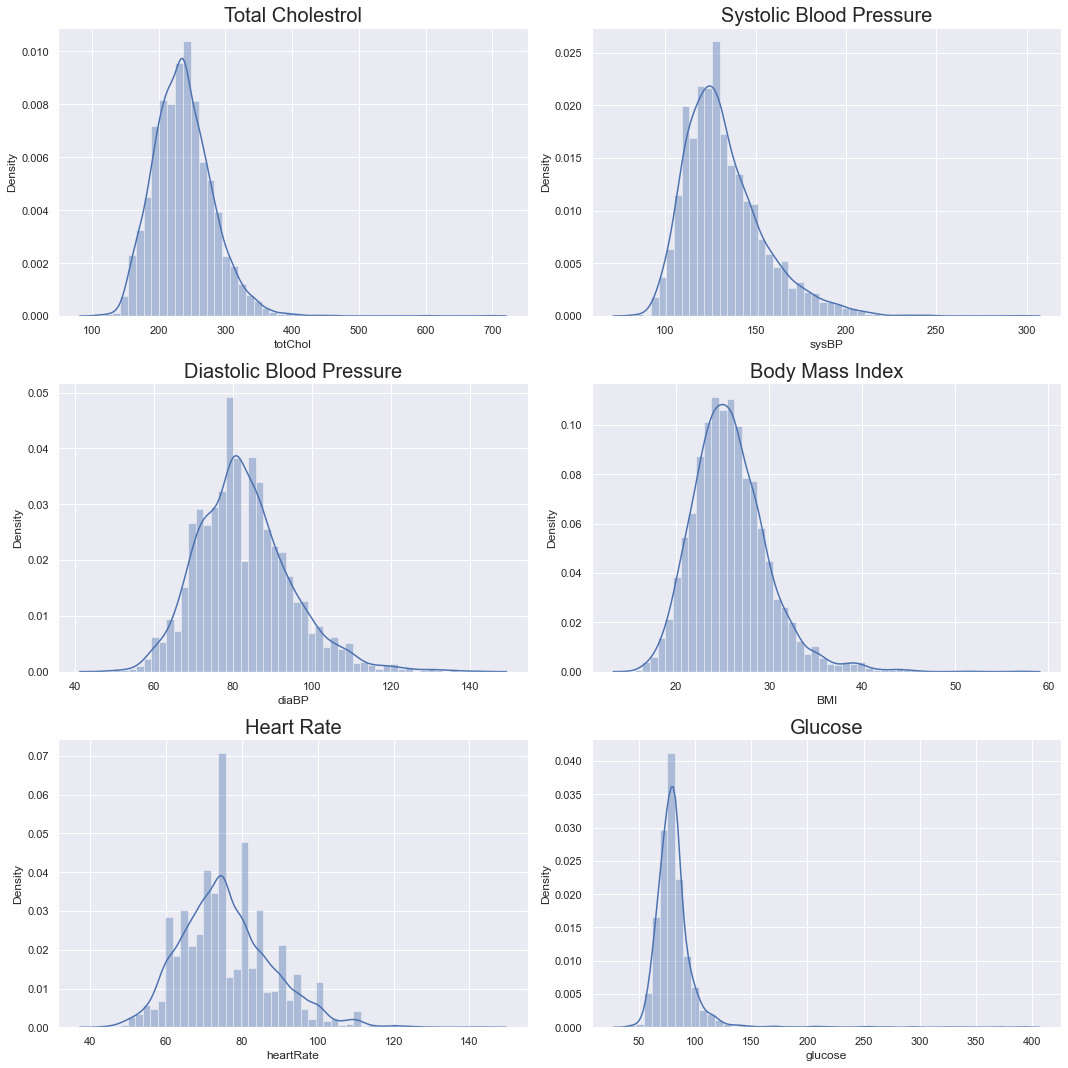

In [236]:
fig, axes = plt.subplots(3, 2,figsize=(15,15))
sns.distplot(df['totChol'], ax=axes[0,0])
sns.distplot(df['sysBP'], ax=axes[0,1])
sns.distplot(df['diaBP'], ax=axes[1,0])
sns.distplot(df['BMI'], ax=axes[1,1])
sns.distplot(df['heartRate'], ax=axes[2,0])
sns.distplot(df['glucose'], ax=axes[2,1])
axes[0,0].set_title("Total Cholestrol", fontsize = 20,loc='center')
axes[0,1].set_title("Systolic Blood Pressure", fontsize = 20,loc='center')
axes[1,0].set_title("Diastolic Blood Pressure", fontsize = 20,loc='center')
axes[1,1].set_title("Body Mass Index", fontsize = 20,loc='center')
axes[2,0].set_title("Heart Rate", fontsize = 20,loc='center')
axes[2,1].set_title("Glucose", fontsize = 20,loc='center')
plt.tight_layout()

# Logistic Regression

### 1 ) Type of regression analysis in statistics used for prediction of outcome of a categorical dependent variable from a set of predictor or independent variables. In logistic regression the dependent variable is always binary

### 2) Mainly used to for prediction and also calculating the probability of success

### 3) P value higher than the preferred alpha(5%) and thereby showing low statistically significant relationship with the probability of heart disease.

In [237]:
#https://towardsdatascience.com/logistic-regression-detailed-overview-46c4da4303bc

In [255]:
df.drop(['education'], axis=1,inplace=True)

In [256]:
df.head()

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<Figure size 288x288 with 0 Axes>

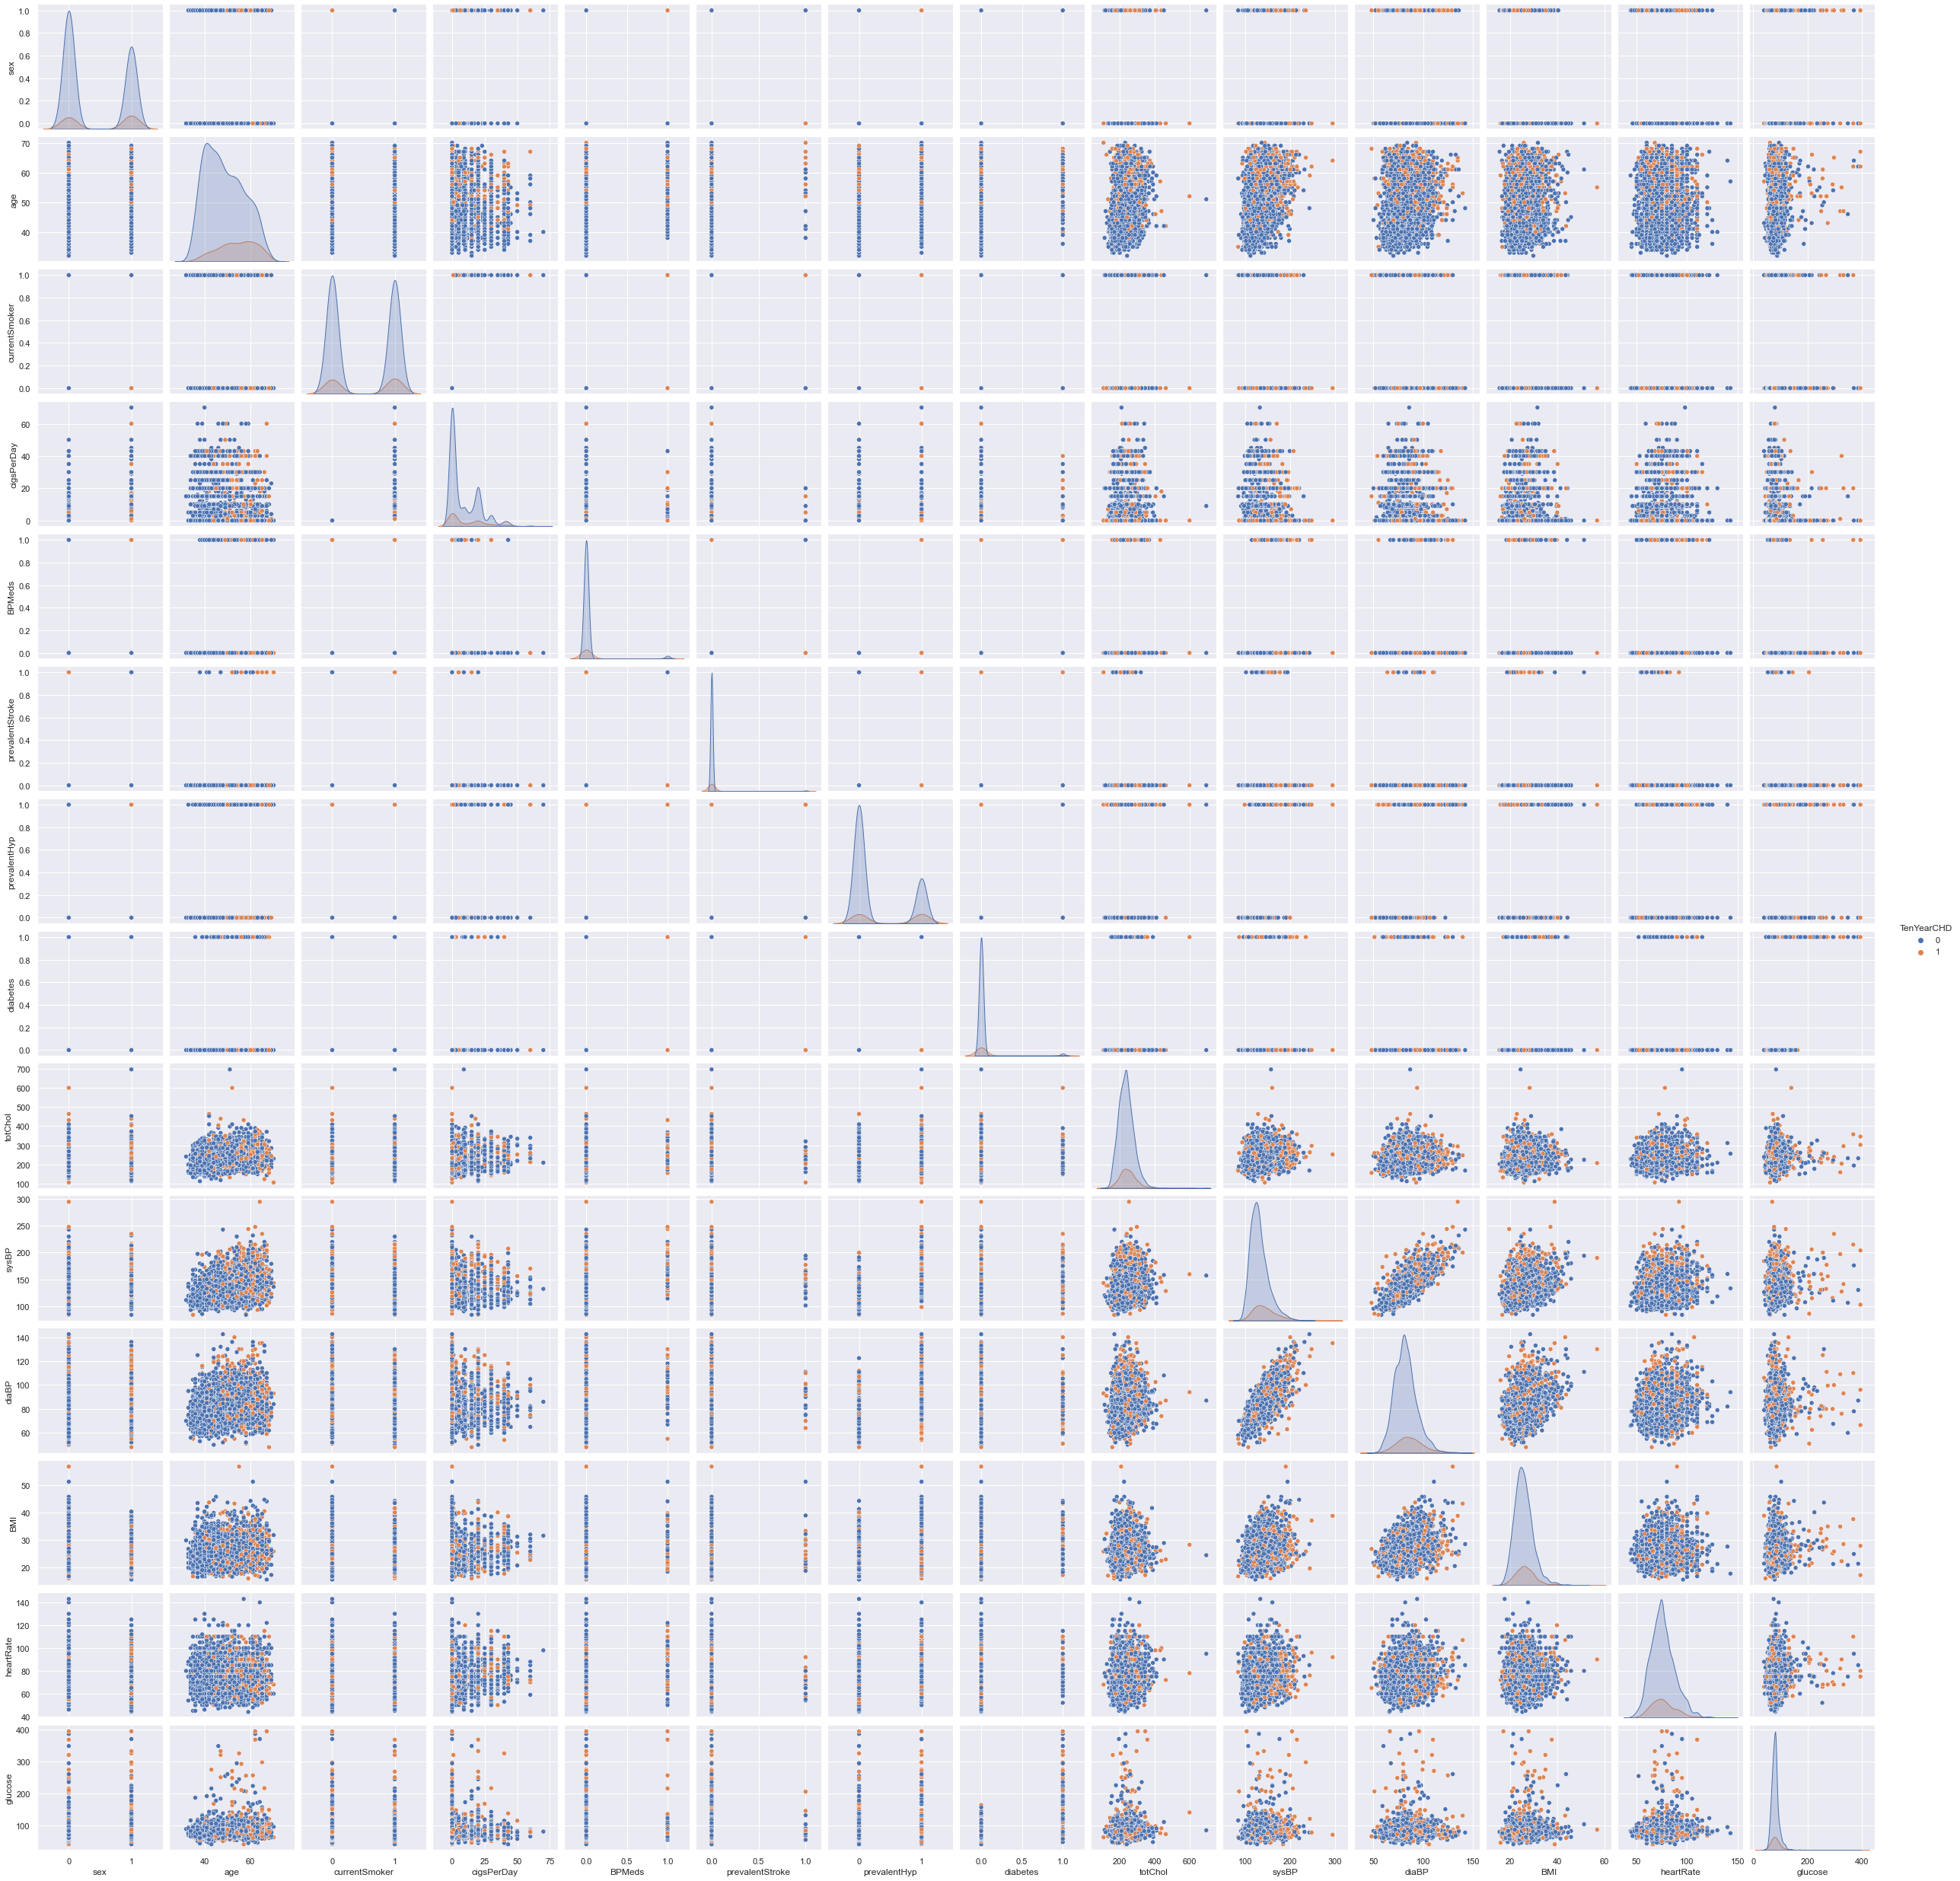

In [302]:
plt.figure(figsize=(4,4))
sns.pairplot(df, hue='TenYearCHD', size=2.5);

In [259]:
X = df[['sex','age','currentSmoker','cigsPerDay','BPMeds','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]

In [260]:
X.head()

,sex,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0


In [261]:
y = df[['TenYearCHD']]

In [262]:
y.head()

,TenYearCHD
0,0
1,0
2,0
3,1
4,0


In [279]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [264]:
clf = LogisticRegression()

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [266]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(3390, 14) (848, 14)
(3390, 1) (848, 1)


In [267]:
clf.fit(X_train,y_train)

LogisticRegression()

In [283]:
print (clf.intercept_, clf.coef_)

[-0.43772326] [[ 0.38548167  0.03455058 -0.33072455  0.02447158  0.19613531  0.07563836
   1.01753643  0.17749511 -0.00214596  0.01312906 -0.02475257 -0.05693859
  -0.02408617  0.00527691]]


In [297]:
pred = clf.predict(X_test)

In [299]:
accuracy_score(pred,y_test)

0.8561320754716981

In [300]:
confusion_matrix(pred,y_test)

array([[719, 117],
       [  5,   7]], dtype=int64)

<AxesSubplot:>

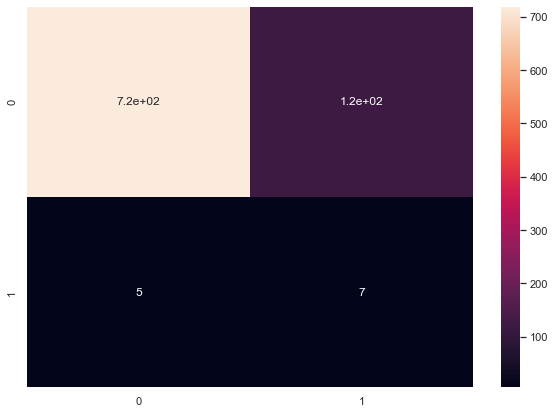

In [303]:
sns.heatmap(confusion_matrix(pred,y_test),annot=True)

In [286]:
print ('Accuracy: {0}'.format(clf.score(X_train, y_train)))

Accuracy: 0.8498525073746312


In [293]:
print ('Accuracy: {0}'.format(clf.score(X_test, y_test)))

Accuracy: 0.8561320754716981
